In [1]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from torchvision import datasets,transforms
import torch.nn.functional as F

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
pwd

'C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning\\03-CNN-Convolutional-Neural-Networks'

In [5]:
transform=transforms.ToTensor()

In [6]:
train_data=datasets.MNIST(root='C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning',
                         train=True,download=True,transform=transform)

In [7]:
test_data=datasets.MNIST(root='C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning',
                         train=False,download=True,transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\SEEMA YADAV\Desktop\AI-MachineLearning
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
type(train_data[0])

tuple

In [12]:
image,label=train_data[0]

In [13]:
label

5

In [14]:
image.shape

torch.Size([1, 28, 28])

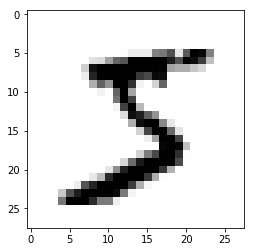

In [15]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

In [16]:
torch.manual_seed(101)

train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=500,shuffle=False)

In [17]:
for img,label in train_loader:
    break

In [18]:
img.shape

torch.Size([100, 1, 28, 28])

In [19]:
label.shape
from torchvision.utils import make_grid

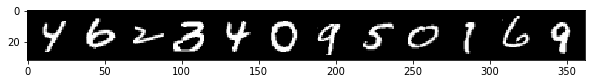

In [20]:
#img[:12].numpy()
im=make_grid(img[:12],nrow=12)
plt.figure(figsize=(10,8))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [21]:
im

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [22]:
class Model(nn.Module):
    def __init__(self,in_szs,out_szs,layers):
        super().__init__()
        layer_list=[]
        for i in layers:
            layer_list.append(nn.Linear(in_szs,i))
            layer_list.append(nn.ReLU(inplace=True))
            in_szs=i
        layer_list.append(nn.Linear(layers[-1],out_szs))
        self.layers=nn.Sequential(*layer_list)
        
    def forward(self,x):
        x=self.layers(x)
        return F.log_softmax(x,dim=1)##doing softmax as it is a multi class classification

In [23]:
torch.manual_seed(101)
model=Model(784,10,[120,84])
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [24]:
x=0
for param in model.parameters():
    print(param.numel())
    x+=param.numel()
print('+')
print("------------------")
print(x)

94080
120
10080
84
840
10
+
------------------
105214


In [25]:
##huge number of parameters just for 60000 28*28 pixel images

In [26]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:
for image,label in train_loader:
    break

In [28]:
image.reshape((100,-1)).size()##instead of reshape can also apply view method

torch.Size([100, 784])

In [29]:
image.view(100,-1).size()

torch.Size([100, 784])

In [30]:
##we want training and test losses for each epoch not batch
import time
start_time=time.time()
train_loss=[]
test_loss=[]
train_correct=[]
test_correct=[]

epochs=10

for i in range(epochs):
    i+=1
    trn_correct=0
    tst_correct=0
    
    for b,(x_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred=model.forward(x_train.view(100,-1))
        loss=criterion(y_pred,y_train)
        batch_correct=(torch.max(y_pred,axis=1)[1]==y_train).sum()
        trn_correct+=batch_correct
        
        if b%200 == 0:
            print(f'epoch: {i} batch: {b} loss: {loss.item()}  \
accuracy: {trn_correct.item()*100/(100*b)}')
    
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(loss)
    train_correct.append(trn_correct)
    
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate(test_loader):
            b+=1
            y_pred=model.forward(x_test.view(500,-1))
            #loss=criterion(y_pred,y_test)
            batch_correct=(torch.max(y_pred,axis=1)[1]==y_test).sum()
            tst_correct+=batch_correct
            
           
        loss=criterion(y_pred,y_test)
        test_loss.append(loss)
        test_correct.append(tst_correct)
            

end_time=time.time()
total_time=end_time-start_time
total_time/=60
print(f'{total_time} minutes')

epoch: 1 batch: 200 loss: 0.3071762025356293  accuracy: 83.795
epoch: 1 batch: 400 loss: 0.15729491412639618  accuracy: 88.095
epoch: 1 batch: 600 loss: 0.22875221073627472  accuracy: 89.95166666666667
epoch: 2 batch: 200 loss: 0.22226101160049438  accuracy: 94.73
epoch: 2 batch: 400 loss: 0.15041333436965942  accuracy: 95.1875
epoch: 2 batch: 600 loss: 0.10263600200414658  accuracy: 95.36166666666666
epoch: 3 batch: 200 loss: 0.04478396475315094  accuracy: 96.705
epoch: 3 batch: 400 loss: 0.08092687278985977  accuracy: 96.8075
epoch: 3 batch: 600 loss: 0.14040137827396393  accuracy: 96.87
epoch: 4 batch: 200 loss: 0.0681593120098114  accuracy: 97.52
epoch: 4 batch: 400 loss: 0.08500460535287857  accuracy: 97.545
epoch: 4 batch: 600 loss: 0.10887956619262695  accuracy: 97.56
epoch: 5 batch: 200 loss: 0.13451825082302094  accuracy: 98.085
epoch: 5 batch: 400 loss: 0.1158832237124443  accuracy: 98.1725
epoch: 5 batch: 600 loss: 0.06157032400369644  accuracy: 98.07166666666667
epoch: 6 ba

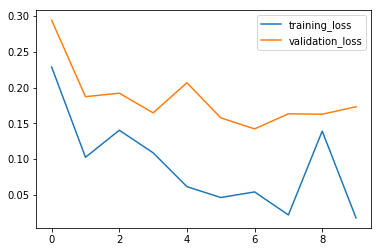

In [31]:
plt.plot(range(epochs),train_loss,label='training_loss')
plt.plot(range(epochs),test_loss,label='validation_loss')
plt.legend()

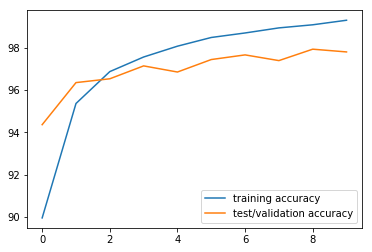

In [36]:
plt.plot(range(epochs),[t/600 for t in train_correct],label='training accuracy')
plt.plot(range(epochs),[t/100 for t in test_correct],label='test/validation accuracy')
plt.legend()

In [37]:
##beyond 8 epochs we can see overfitiing on testing data

In [39]:
unseen_data=DataLoader(test_data,batch_size=10000,shuffle=False)

In [48]:
for x_test,y_test in unseen_data:
    break
x_test[0].size()

torch.Size([1, 28, 28])

In [52]:
correct=0
with torch.no_grad():
    for x_test,y_test in unseen_data:
        y_pred=model.forward(x_test.view(len(x_test),-1))
        correct+=(torch.max(y_pred,1)[1]==y_test).sum()
        

In [53]:
print(correct)

tensor(9780)


In [56]:
(correct/len(x_test))*100

tensor(97.8000)

In [63]:
y_test.view(-1)

tensor([7, 2, 1,  ..., 4, 5, 6])

In [64]:
torch.max(y_pred,1)[1].view(-1)

tensor([7, 2, 1,  ..., 4, 5, 6])

In [65]:
confusion_matrix(torch.max(y_pred,1)[1].view(-1),y_test.view(-1))

array([[ 970,    0,    2,    0,    0,    2,    4,    0,    1,    0],
       [   0, 1125,    2,    1,    0,    0,    3,    7,    1,    4],
       [   2,    3, 1014,    4,    3,    0,    2,    7,    3,    0],
       [   1,    2,    4,  986,    0,   15,    1,    2,    3,    4],
       [   1,    0,    2,    0,  969,    2,    9,    2,    4,   12],
       [   0,    0,    0,    4,    0,  851,    3,    0,    0,    2],
       [   1,    1,    1,    0,    4,    3,  932,    0,    0,    0],
       [   1,    0,    3,    3,    1,    2,    0, 1003,    4,    8],
       [   4,    4,    4,    7,    0,   13,    4,    3,  956,    5],
       [   0,    0,    0,    5,    5,    4,    0,    4,    2,  974]],
      dtype=int64)